In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_stata('PKKR71FL.DTA')

# Data Preprocessing

In [3]:
df1= df[['h11','caseid','v116','v113','b19','b4','m18','m19','v730','v012','v136','v106','v714','v190','v101','v140']]

In [4]:
df1 = df1[df1['h11'] != "don't know"]
df1['h11'] = df1['h11'].map({'no': 0, 'yes, last two weeks': 1})

In [5]:
df1= df1.dropna(subset=['h11'])

In [6]:
df1

,h11,caseid,v116,v113,b19,b4,m18,m19,v730,v012,v136,v106,v714,v190,v101,v140
0,0.0,1 1 2,flush to pit latrine,unprotected spring,42,male,smaller than average,not weighed at birth,44.0,35,7,secondary,no,poorest,kpk,rural
2,0.0,1 8 7,flush to pit latrine,river/dam/lake/ponds/stream/canal/irrigation c...,8,female,average,not weighed at birth,25.0,21,9,higher,no,poorer,kpk,rural
3,0.0,1 9 4,flush to pit latrine,unprotected spring,29,female,average,not weighed at birth,38.0,28,8,no education,no,poorest,kpk,rural
4,0.0,1 9 4,flush to pit latrine,unprotected spring,49,male,average,not weighed at birth,38.0,28,8,no education,no,poorest,kpk,rural
5,0.0,1 10 7,flush to pit latrine,protected spring,26,female,average,2000.0,45.0,35,11,higher,yes,poorer,kpk,rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0.0,580 21 2,flush to pit latrine,tube well or borehole,9,male,larger than average,5500.0,40.0,28,3,higher,yes,richest,ajk,urban
12704,0.0,580 24 4,flush to pit latrine,tube well or borehole,17,female,average,not weighed at birth,30.0,25,11,secondary,no,middle,ajk,urban
12705,0.0,580 25 3,ventilated improved pit latrine (vip),tube well or borehole,1,female,average,2400.0,33.0,25,10,higher,no,richest,ajk,urban
12706,0.0,580 25 3,ventilated improved pit latrine (vip),tube well or borehole,1,female,average,2200.0,33.0,25,10,higher,no,richest,ajk,urban


In [7]:
df1.isnull().sum()

h11         0
caseid      0
v116        0
v113        0
b19         0
b4          0
m18         3
m19         4
v730      131
v012        0
v136        0
v106        0
v714        2
v190        0
v101        0
v140        0
dtype: int64

In [8]:
df1['v116'].value_counts()

flush to septic tank                     3017
flush to pit latrine                     2868
flush to piped sewer system              2659
no facility/bush/field                   1349
flush to somewhere else                   421
pit latrine with slab                     413
not a dejure resident                     380
pit latrine without slab/open pit         266
composting toilet                         238
bucket toilet                             107
flush, don't know where                   100
ventilated improved pit latrine (vip)      63
other                                      39
hanging toilet/latrine                     27
Name: v116, dtype: int64

In [9]:
df1 = df1[df1['v116'] != "not a dejure resident"]

In [10]:
# Define a list of improved toilet facility categories
improved_categories = ['flush to septic tank', 'flush to piped sewer system',
                       'flush to somewhere else', 'pit latrine with slab', 'composting toilet',
                       'flush, don\'t know where', 'ventilated improved pit latrine (vip)']

# Create a binary variable indicating improved (1) and unimproved (0) toilet facilities
df1['improved_toilet'] = df1['v116'].isin(improved_categories).astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_24536\3459918877.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['improved_toilet'] = df1['v116'].isin(improved_categories).astype(int)


In [11]:
df1

,h11,caseid,v116,v113,b19,b4,m18,m19,v730,v012,v136,v106,v714,v190,v101,v140,improved_toilet
0,0.0,1 1 2,flush to pit latrine,unprotected spring,42,male,smaller than average,not weighed at birth,44.0,35,7,secondary,no,poorest,kpk,rural,0
2,0.0,1 8 7,flush to pit latrine,river/dam/lake/ponds/stream/canal/irrigation c...,8,female,average,not weighed at birth,25.0,21,9,higher,no,poorer,kpk,rural,0
3,0.0,1 9 4,flush to pit latrine,unprotected spring,29,female,average,not weighed at birth,38.0,28,8,no education,no,poorest,kpk,rural,0
4,0.0,1 9 4,flush to pit latrine,unprotected spring,49,male,average,not weighed at birth,38.0,28,8,no education,no,poorest,kpk,rural,0
5,0.0,1 10 7,flush to pit latrine,protected spring,26,female,average,2000.0,45.0,35,11,higher,yes,poorer,kpk,rural,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0.0,580 21 2,flush to pit latrine,tube well or borehole,9,male,larger than average,5500.0,40.0,28,3,higher,yes,richest,ajk,urban,0
12704,0.0,580 24 4,flush to pit latrine,tube well or borehole,17,female,average,not weighed at birth,30.0,25,11,secondary,no,middle,ajk,urban,0
12705,0.0,580 25 3,ventilated improved pit latrine (vip),tube well or borehole,1,female,average,2400.0,33.0,25,10,higher,no,richest,ajk,urban,1
12706,0.0,580 25 3,ventilated improved pit latrine (vip),tube well or borehole,1,female,average,2200.0,33.0,25,10,higher,no,richest,ajk,urban,1


In [12]:
df1=df1.drop(columns=['v116'])

In [13]:
# Define a list of improved drinking water source categories
improved_categories = ['piped into dwelling', 'public tap/standpipe', 'protected well', 'protected spring',
                       'piped to yard/plot', 'bottled water', 'filtration plant', 'tube well or borehole']

# Create a binary variable indicating improved (1) and unimproved (0) drinking water sources
df1['improved_water'] = df1['v113'].isin(improved_categories).astype(int)
df1=df1.drop(columns=['v113'])

In [14]:
df1['improved_water'].value_counts()

1    9925
0    1642
Name: improved_water, dtype: int64

In [15]:
df1

,h11,caseid,b19,b4,m18,m19,v730,v012,v136,v106,v714,v190,v101,v140,improved_toilet,improved_water
0,0.0,1 1 2,42,male,smaller than average,not weighed at birth,44.0,35,7,secondary,no,poorest,kpk,rural,0,0
2,0.0,1 8 7,8,female,average,not weighed at birth,25.0,21,9,higher,no,poorer,kpk,rural,0,0
3,0.0,1 9 4,29,female,average,not weighed at birth,38.0,28,8,no education,no,poorest,kpk,rural,0,0
4,0.0,1 9 4,49,male,average,not weighed at birth,38.0,28,8,no education,no,poorest,kpk,rural,0,0
5,0.0,1 10 7,26,female,average,2000.0,45.0,35,11,higher,yes,poorer,kpk,rural,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0.0,580 21 2,9,male,larger than average,5500.0,40.0,28,3,higher,yes,richest,ajk,urban,0,1
12704,0.0,580 24 4,17,female,average,not weighed at birth,30.0,25,11,secondary,no,middle,ajk,urban,0,1
12705,0.0,580 25 3,1,female,average,2400.0,33.0,25,10,higher,no,richest,ajk,urban,1,1
12706,0.0,580 25 3,1,female,average,2200.0,33.0,25,10,higher,no,richest,ajk,urban,1,1


In [16]:
df1['b19'].info()

<class 'pandas.core.series.Series'>
Int64Index: 11567 entries, 0 to 12707
Series name: b19
Non-Null Count  Dtype
--------------  -----
11567 non-null  int8 
dtypes: int8(1)
memory usage: 101.7 KB


In [17]:
df1['b4'].value_counts()

male      5906
female    5661
Name: b4, dtype: int64

In [18]:
df1['Gender_male'] = df1['b4'].map({'female': 0, 'male': 1})

In [19]:
df1=df1.drop(columns=['b4'])

In [20]:
df1['m18'].value_counts()

average                 8659
smaller than average    1515
larger than average      824
very small               458
very large                74
don't know                34
Name: m18, dtype: int64

In [21]:
df1['Size_Child'] = df1['m18'].map({'very small': 1, 'smaller than average': 2, 'average': 3, 'larger than average': 4, 'very large': 5, "don't know": np.nan })


In [22]:
df1=df1.drop(columns=['m18'])

In [23]:
df1

,h11,caseid,b19,m19,v730,v012,v136,v106,v714,v190,v101,v140,improved_toilet,improved_water,Gender_male,Size_Child
0,0.0,1 1 2,42,not weighed at birth,44.0,35,7,secondary,no,poorest,kpk,rural,0,0,1,2.0
2,0.0,1 8 7,8,not weighed at birth,25.0,21,9,higher,no,poorer,kpk,rural,0,0,0,3.0
3,0.0,1 9 4,29,not weighed at birth,38.0,28,8,no education,no,poorest,kpk,rural,0,0,0,3.0
4,0.0,1 9 4,49,not weighed at birth,38.0,28,8,no education,no,poorest,kpk,rural,0,0,1,3.0
5,0.0,1 10 7,26,2000.0,45.0,35,11,higher,yes,poorer,kpk,rural,0,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0.0,580 21 2,9,5500.0,40.0,28,3,higher,yes,richest,ajk,urban,0,1,1,4.0
12704,0.0,580 24 4,17,not weighed at birth,30.0,25,11,secondary,no,middle,ajk,urban,0,1,0,3.0
12705,0.0,580 25 3,1,2400.0,33.0,25,10,higher,no,richest,ajk,urban,1,1,0,3.0
12706,0.0,580 25 3,1,2200.0,33.0,25,10,higher,no,richest,ajk,urban,1,1,0,3.0


In [24]:
df1['m19'].replace({'not weighed at birth': np.nan, "don't know": np.nan}, inplace=True)

In [25]:
df1['Birth Weight'] = df1['m19'].astype('float64')

In [26]:
df1=df1.drop(columns=['m19'])

In [27]:
df1['Birth Weight'].value_counts()

3000.0    532
2500.0    303
3500.0    246
2000.0    185
4000.0    128
         ... 
3670.0      1
3540.0      1
750.0       1
3007.0      1
2980.0      1
Name: Birth Weight, Length: 111, dtype: int64

In [28]:
df1.rename(columns={'v012': "mother's age"}, inplace=True)

In [29]:
df1

,h11,caseid,b19,v730,mother's age,v136,v106,v714,v190,v101,v140,improved_toilet,improved_water,Gender_male,Size_Child,Birth Weight
0,0.0,1 1 2,42,44.0,35,7,secondary,no,poorest,kpk,rural,0,0,1,2.0,NaN
2,0.0,1 8 7,8,25.0,21,9,higher,no,poorer,kpk,rural,0,0,0,3.0,NaN
3,0.0,1 9 4,29,38.0,28,8,no education,no,poorest,kpk,rural,0,0,0,3.0,NaN
4,0.0,1 9 4,49,38.0,28,8,no education,no,poorest,kpk,rural,0,0,1,3.0,NaN
5,0.0,1 10 7,26,45.0,35,11,higher,yes,poorer,kpk,rural,0,1,0,3.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0.0,580 21 2,9,40.0,28,3,higher,yes,richest,ajk,urban,0,1,1,4.0,5500.0
12704,0.0,580 24 4,17,30.0,25,11,secondary,no,middle,ajk,urban,0,1,0,3.0,NaN
12705,0.0,580 25 3,1,33.0,25,10,higher,no,richest,ajk,urban,1,1,0,3.0,2400.0
12706,0.0,580 25 3,1,33.0,25,10,higher,no,richest,ajk,urban,1,1,0,3.0,2200.0


In [30]:
df1['v730']=df1['v730'].astype('float')

In [31]:
df1['Age Difference Parents']= abs(df1['v730']-df1["mother's age"])

In [32]:
df1

,h11,caseid,b19,v730,mother's age,v136,v106,v714,v190,v101,v140,improved_toilet,improved_water,Gender_male,Size_Child,Birth Weight,Age Difference Parents
0,0.0,1 1 2,42,44.0,35,7,secondary,no,poorest,kpk,rural,0,0,1,2.0,NaN,9.0
2,0.0,1 8 7,8,25.0,21,9,higher,no,poorer,kpk,rural,0,0,0,3.0,NaN,4.0
3,0.0,1 9 4,29,38.0,28,8,no education,no,poorest,kpk,rural,0,0,0,3.0,NaN,10.0
4,0.0,1 9 4,49,38.0,28,8,no education,no,poorest,kpk,rural,0,0,1,3.0,NaN,10.0
5,0.0,1 10 7,26,45.0,35,11,higher,yes,poorer,kpk,rural,0,1,0,3.0,2000.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0.0,580 21 2,9,40.0,28,3,higher,yes,richest,ajk,urban,0,1,1,4.0,5500.0,12.0
12704,0.0,580 24 4,17,30.0,25,11,secondary,no,middle,ajk,urban,0,1,0,3.0,NaN,5.0
12705,0.0,580 25 3,1,33.0,25,10,higher,no,richest,ajk,urban,1,1,0,3.0,2400.0,8.0
12706,0.0,580 25 3,1,33.0,25,10,higher,no,richest,ajk,urban,1,1,0,3.0,2200.0,8.0


In [33]:
df1=df1.drop(columns=['v730'])

In [34]:
df1.rename(columns={'v136': "No. Household Members"}, inplace=True)

In [35]:
df1

,h11,caseid,b19,mother's age,No. Household Members,v106,v714,v190,v101,v140,improved_toilet,improved_water,Gender_male,Size_Child,Birth Weight,Age Difference Parents
0,0.0,1 1 2,42,35,7,secondary,no,poorest,kpk,rural,0,0,1,2.0,NaN,9.0
2,0.0,1 8 7,8,21,9,higher,no,poorer,kpk,rural,0,0,0,3.0,NaN,4.0
3,0.0,1 9 4,29,28,8,no education,no,poorest,kpk,rural,0,0,0,3.0,NaN,10.0
4,0.0,1 9 4,49,28,8,no education,no,poorest,kpk,rural,0,0,1,3.0,NaN,10.0
5,0.0,1 10 7,26,35,11,higher,yes,poorer,kpk,rural,0,1,0,3.0,2000.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0.0,580 21 2,9,28,3,higher,yes,richest,ajk,urban,0,1,1,4.0,5500.0,12.0
12704,0.0,580 24 4,17,25,11,secondary,no,middle,ajk,urban,0,1,0,3.0,NaN,5.0
12705,0.0,580 25 3,1,25,10,higher,no,richest,ajk,urban,1,1,0,3.0,2400.0,8.0
12706,0.0,580 25 3,1,25,10,higher,no,richest,ajk,urban,1,1,0,3.0,2200.0,8.0


In [36]:
df1.rename(columns={'v714': "Mother's Working Status"}, inplace=True)

In [37]:
df1["Mother's Working Status"].value_counts()

no     10241
yes     1324
Name: Mother's Working Status, dtype: int64

In [38]:
df1["Mother's Working Status"] = df1["Mother's Working Status"].map({'no': 0, 'yes': 1})

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11567 entries, 0 to 12707
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   h11                      11567 non-null  float64 
 1   caseid                   11567 non-null  object  
 2   b19                      11567 non-null  int8    
 3   mother's age             11567 non-null  int8    
 4   No. Household Members    11567 non-null  int8    
 5   v106                     11567 non-null  category
 6   Mother's Working Status  11565 non-null  category
 7   v190                     11567 non-null  category
 8   v101                     11567 non-null  category
 9   v140                     11567 non-null  category
 10  improved_toilet          11567 non-null  int32   
 11  improved_water           11567 non-null  int32   
 12  Gender_male              11567 non-null  category
 13  Size_Child               11530 non-null  float64 
 14  Birth 

In [40]:
df1

,h11,caseid,b19,mother's age,No. Household Members,v106,Mother's Working Status,v190,v101,v140,improved_toilet,improved_water,Gender_male,Size_Child,Birth Weight,Age Difference Parents
0,0.0,1 1 2,42,35,7,secondary,0,poorest,kpk,rural,0,0,1,2.0,NaN,9.0
2,0.0,1 8 7,8,21,9,higher,0,poorer,kpk,rural,0,0,0,3.0,NaN,4.0
3,0.0,1 9 4,29,28,8,no education,0,poorest,kpk,rural,0,0,0,3.0,NaN,10.0
4,0.0,1 9 4,49,28,8,no education,0,poorest,kpk,rural,0,0,1,3.0,NaN,10.0
5,0.0,1 10 7,26,35,11,higher,1,poorer,kpk,rural,0,1,0,3.0,2000.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0.0,580 21 2,9,28,3,higher,1,richest,ajk,urban,0,1,1,4.0,5500.0,12.0
12704,0.0,580 24 4,17,25,11,secondary,0,middle,ajk,urban,0,1,0,3.0,NaN,5.0
12705,0.0,580 25 3,1,25,10,higher,0,richest,ajk,urban,1,1,0,3.0,2400.0,8.0
12706,0.0,580 25 3,1,25,10,higher,0,richest,ajk,urban,1,1,0,3.0,2200.0,8.0


In [41]:
df1

,h11,caseid,b19,mother's age,No. Household Members,v106,Mother's Working Status,v190,v101,v140,improved_toilet,improved_water,Gender_male,Size_Child,Birth Weight,Age Difference Parents
0,0.0,1 1 2,42,35,7,secondary,0,poorest,kpk,rural,0,0,1,2.0,NaN,9.0
2,0.0,1 8 7,8,21,9,higher,0,poorer,kpk,rural,0,0,0,3.0,NaN,4.0
3,0.0,1 9 4,29,28,8,no education,0,poorest,kpk,rural,0,0,0,3.0,NaN,10.0
4,0.0,1 9 4,49,28,8,no education,0,poorest,kpk,rural,0,0,1,3.0,NaN,10.0
5,0.0,1 10 7,26,35,11,higher,1,poorer,kpk,rural,0,1,0,3.0,2000.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0.0,580 21 2,9,28,3,higher,1,richest,ajk,urban,0,1,1,4.0,5500.0,12.0
12704,0.0,580 24 4,17,25,11,secondary,0,middle,ajk,urban,0,1,0,3.0,NaN,5.0
12705,0.0,580 25 3,1,25,10,higher,0,richest,ajk,urban,1,1,0,3.0,2400.0,8.0
12706,0.0,580 25 3,1,25,10,higher,0,richest,ajk,urban,1,1,0,3.0,2200.0,8.0


In [42]:
df1['v190'].value_counts()

poorest    2655
poorer     2633
middle     2282
richer     2025
richest    1972
Name: v190, dtype: int64

In [43]:
df1['Wealth'] = df1['v190'].map({'poorest': 1, 'poorer': 2, 'middle':3, 'richer': 4, 'richest':5})

In [44]:
df1=df1.drop(columns=['v190'])

In [45]:
df1

,h11,caseid,b19,mother's age,No. Household Members,v106,Mother's Working Status,v101,v140,improved_toilet,improved_water,Gender_male,Size_Child,Birth Weight,Age Difference Parents,Wealth
0,0.0,1 1 2,42,35,7,secondary,0,kpk,rural,0,0,1,2.0,NaN,9.0,1
2,0.0,1 8 7,8,21,9,higher,0,kpk,rural,0,0,0,3.0,NaN,4.0,2
3,0.0,1 9 4,29,28,8,no education,0,kpk,rural,0,0,0,3.0,NaN,10.0,1
4,0.0,1 9 4,49,28,8,no education,0,kpk,rural,0,0,1,3.0,NaN,10.0,1
5,0.0,1 10 7,26,35,11,higher,1,kpk,rural,0,1,0,3.0,2000.0,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0.0,580 21 2,9,28,3,higher,1,ajk,urban,0,1,1,4.0,5500.0,12.0,5
12704,0.0,580 24 4,17,25,11,secondary,0,ajk,urban,0,1,0,3.0,NaN,5.0,3
12705,0.0,580 25 3,1,25,10,higher,0,ajk,urban,1,1,0,3.0,2400.0,8.0,5
12706,0.0,580 25 3,1,25,10,higher,0,ajk,urban,1,1,0,3.0,2200.0,8.0,5


In [46]:
df1['Residence_Urban'] = df1['v140'].map({'rural': 0, 'urban': 1})
df1['Residence_Urban'].replace('not a dejure resident', pd.NA, inplace=True)

In [47]:
df1=df1.drop(columns=['v140'])

In [48]:
df1.rename(columns={'v101': "Region"}, inplace=True)

In [49]:
df1

,h11,caseid,b19,mother's age,No. Household Members,v106,Mother's Working Status,Region,improved_toilet,improved_water,Gender_male,Size_Child,Birth Weight,Age Difference Parents,Wealth,Residence_Urban
0,0.0,1 1 2,42,35,7,secondary,0,kpk,0,0,1,2.0,NaN,9.0,1,0.0
2,0.0,1 8 7,8,21,9,higher,0,kpk,0,0,0,3.0,NaN,4.0,2,0.0
3,0.0,1 9 4,29,28,8,no education,0,kpk,0,0,0,3.0,NaN,10.0,1,0.0
4,0.0,1 9 4,49,28,8,no education,0,kpk,0,0,1,3.0,NaN,10.0,1,0.0
5,0.0,1 10 7,26,35,11,higher,1,kpk,0,1,0,3.0,2000.0,10.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0.0,580 21 2,9,28,3,higher,1,ajk,0,1,1,4.0,5500.0,12.0,5,1.0
12704,0.0,580 24 4,17,25,11,secondary,0,ajk,0,1,0,3.0,NaN,5.0,3,1.0
12705,0.0,580 25 3,1,25,10,higher,0,ajk,1,1,0,3.0,2400.0,8.0,5,1.0
12706,0.0,580 25 3,1,25,10,higher,0,ajk,1,1,0,3.0,2200.0,8.0,5,1.0


In [50]:
df1.rename(columns={'b19': "Age in Months"}, inplace=True)
df1.rename(columns={'v106': "Educational Attainment"}, inplace=True)

In [51]:
dummy=pd.get_dummies(df1['Region'], prefix='Region',drop_first=True)
df1 = pd.concat([df1, dummy], axis=1)
df1=df1.drop(columns=['Region'])

In [52]:
df1['Educational Attainment'] = df1['Educational Attainment'].map({'no education': 1, 'primary': 2, 'secondary':3, 'higher': 4})


In [53]:
df1.rename(columns={'h11': "Diarrhea Occurrence"}, inplace=True)

In [54]:
#Filling the missing values
df1.isnull().sum()

Diarrhea Occurrence           0
caseid                        0
Age in Months                 0
mother's age                  0
No. Household Members         0
Educational Attainment        0
Mother's Working Status       2
improved_toilet               0
improved_water                0
Gender_male                   0
Size_Child                   37
Birth Weight               9505
Age Difference Parents      130
Wealth                        0
Residence_Urban               0
Region_sindh                  0
Region_kpk                    0
Region_balochistan            0
Region_gb                     0
Region_ict                    0
Region_ajk                    0
Region_fata                   0
dtype: int64

In [55]:
median_age= df1['Age Difference Parents'].median()

In [56]:
df1['Age Difference Parents'].fillna(median_age, inplace=True)

In [57]:
df1

,Diarrhea Occurrence,caseid,Age in Months,mother's age,No. Household Members,Educational Attainment,Mother's Working Status,improved_toilet,improved_water,Gender_male,...,Age Difference Parents,Wealth,Residence_Urban,Region_sindh,Region_kpk,Region_balochistan,Region_gb,Region_ict,Region_ajk,Region_fata
0,0.0,1 1 2,42,35,7,3,0,0,0,1,...,9.0,1,0.0,0,1,0,0,0,0,0
2,0.0,1 8 7,8,21,9,4,0,0,0,0,...,4.0,2,0.0,0,1,0,0,0,0,0
3,0.0,1 9 4,29,28,8,1,0,0,0,0,...,10.0,1,0.0,0,1,0,0,0,0,0
4,0.0,1 9 4,49,28,8,1,0,0,0,1,...,10.0,1,0.0,0,1,0,0,0,0,0
5,0.0,1 10 7,26,35,11,4,1,0,1,0,...,10.0,2,0.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0.0,580 21 2,9,28,3,4,1,0,1,1,...,12.0,5,1.0,0,0,0,0,0,1,0
12704,0.0,580 24 4,17,25,11,3,0,0,1,0,...,5.0,3,1.0,0,0,0,0,0,1,0
12705,0.0,580 25 3,1,25,10,4,0,1,1,0,...,8.0,5,1.0,0,0,0,0,0,1,0
12706,0.0,580 25 3,1,25,10,4,0,1,1,0,...,8.0,5,1.0,0,0,0,0,0,1,0


In [58]:
mode_work= df1["Mother's Working Status"].mode()[0]

In [59]:
df1["Mother's Working Status"].fillna(mode_work, inplace=True)

In [60]:
median_size= df1['Size_Child'].median()
df1['Size_Child'].fillna(median_size, inplace=True)

In [61]:
median_weight= df1['Birth Weight'].median()
df1['Birth Weight'].fillna(median_weight, inplace=True)

In [62]:
df1['Educational Attainment'] = df1['Educational Attainment'].astype(float)
df1["Mother's Working Status"] = df1["Mother's Working Status"].astype(float)
df1["Gender_male"] = df1["Gender_male"].astype(float)
df1["Wealth"] = df1["Wealth"].astype(float)

# Descriptive Statistics and EDA

In [71]:

#Data Cleaning for Trend Analysis
df12= pd.read_stata('PKKR61FL.DTA')

In [72]:
df12= df12[['h11','v116','v113','v101','v140']]
df12 = df12[df12['h11'] != "don't know"]
df12['h11'] = df12['h11'].map({'No': 0, 'Yes, last two weeks': 1})
df12=df12.dropna(subset=['h11'])


In [73]:
# Define a list of improved drinking water source categories
improved_categories = ['Piped into dwelling', 'Public tap/standpipe', 'Protected well', 'Protected spring',
                       'Piped to yard/plot', 'Bottled water', 'Filtration plant', 'Tube well or borehole']

# Create a binary variable indicating improved (1) and unimproved (0) drinking water sources
df12['improved_water'] = df12['v113'].isin(improved_categories).astype(int)
df12=df12.drop(columns=['v113'])
df12.rename(columns={'h11': "Diarrhea Occurrence"}, inplace=True)

In [74]:
# Define a list of improved toilet facility categories
improved_categories = ['Flush to septic tank', 'Flush to piped sewer system',
                       'Flush to somewhere else', 'Pit latrine with slab',
                       'Flush, don\'t know where', 'Ventilated Improved Pit latrine (vip)']

# Create a binary variable indicating improved (1) and unimproved (0) toilet facilities
df12['improved_toilet'] = df12['v116'].isin(improved_categories).astype(int)
df12=df12.drop(columns=['v116'])

In [75]:
df12.rename(columns={'v140': "Place of Residence"}, inplace=True)
df12.rename(columns={'v101': "Region"}, inplace=True)

In [76]:
df12['Region'].value_counts()

Punjab                2994
Sindh                 2318
Khyber Pakhtunkhwa    2153
Balochistan           1730
Gilgit Baltistan      1013
Islamabad (ICT)        672
Name: Region, dtype: int64

In [77]:
df2=df[['h11','v116','v113','v101','v140']]
df2 = df2[df2['h11'] != "don't know"]
df2['h11'] = df2['h11'].map({'no': 0, 'yes, last two weeks': 1})
df2=df2.dropna(subset=['h11'])
# Define a list of improved drinking water source categories
improved_categories = ['piped into dwelling', 'public tap/standpipe', 'protected well', 'protected spring',
                       'piped to yard/plot', 'bottled water', 'filtration plant', 'tube well or borehole']

# Create a binary variable indicating improved (1) and unimproved (0) drinking water sources
df2['improved_water'] = df2['v113'].isin(improved_categories).astype(int)
df2=df2.drop(columns=['v113'])
df2.rename(columns={'h11': "Diarrhea Occurrence"}, inplace=True)

In [78]:
# Define a list of improved toilet facility categories
improved_categories = ['flush to septic tank', 'flush to piped sewer system', 'composting toilet'
                       'flush to somewhere else', 'pit latrine with slab',
                       'flush, don\'t know where', 'ventilated improved pit latrine (vip)']

# Create a binary variable indicating improved (1) and unimproved (0) toilet facilities
df2['improved_toilet'] = df2['v116'].isin(improved_categories).astype(int)
df2=df2.drop(columns=['v116'])

In [79]:
df2.rename(columns={'v140': "Place of Residence"}, inplace=True)
df2.rename(columns={'v101': "Region"}, inplace=True)

In [80]:
df2['Place of Residence'] = df2['Place of Residence'].map({'rural': 'Rural', 'urban': 'Urban'})

In [81]:
df2

,Diarrhea Occurrence,Region,Place of Residence,improved_water,improved_toilet
0,0.0,kpk,Rural,0,0
2,0.0,kpk,Rural,0,0
3,0.0,kpk,Rural,0,0
4,0.0,kpk,Rural,0,0
5,0.0,kpk,Rural,1,0
...,...,...,...,...,...
12703,0.0,ajk,Urban,1,0
12704,0.0,ajk,Urban,1,0
12705,0.0,ajk,Urban,1,1
12706,0.0,ajk,Urban,1,1


In [82]:
df2['Region'].value_counts()

punjab         2553
sindh          2147
kpk            1987
balochistan    1379
ajk            1247
fata            999
gb              864
ict             771
Name: Region, dtype: int64

In [83]:
df2['Region'] = df2['Region'].map({'punjab': 'Punjab', 'sindh': 'Sindh', 'kpk': 'Khyber Pakhtunkhwa', 'balochistan': 'Balochistan', 'ajk': 'Azad Jammu Kashmir', 'gb':'Gilgit Baltistan', 'ict': 'Islamabad (ICT)', 'fata': 'Fata'})

In [84]:
df2= df2[(df2['Region']!='Azad Jammu Kashmir') & (df2['Region']!='Fata')]

In [85]:
df12

,Diarrhea Occurrence,Region,Place of Residence,improved_water,improved_toilet
0,0.0,Punjab,Urban,1,1
1,0.0,Punjab,Urban,1,1
2,0.0,Punjab,Urban,1,1
3,0.0,Punjab,Urban,1,1
4,0.0,Punjab,Urban,0,1
...,...,...,...,...,...
11758,0.0,Islamabad (ICT),Rural,1,1
11759,0.0,Islamabad (ICT),Rural,1,1
11760,0.0,Islamabad (ICT),Rural,1,1
11761,0.0,Islamabad (ICT),Rural,1,1


In [86]:
# Add 'year' column to df2 and df12
df2['year'] = '2017-18'
df12['year'] = '2012-13'

# Concatenate df2 and df12
cdf = pd.concat([df2, df12], ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_24536\234504397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = '2017-18'


In [87]:
cdf=cdf[cdf['Place of Residence']!= 'Not a dejure resident']

In [88]:
#Descriptive Statistics
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diarrhea Occurrence,11567.0,0.175672,0.380557,0.0,0.0,0.0,0.0,1.0
Age in Months,11567.0,29.425175,17.502652,0.0,14.0,29.0,45.0,59.0
mother's age,11567.0,29.352295,6.084052,15.0,25.0,29.0,33.0,49.0
No. Household Members,11567.0,9.394744,5.009360,2.0,6.0,8.0,11.0,44.0
Educational Attainment,11567.0,1.973891,1.137454,1.0,1.0,1.0,3.0,4.0
Mother's Working Status,11567.0,0.114464,0.318387,0.0,0.0,0.0,0.0,1.0
improved_toilet,11567.0,0.597476,0.490428,0.0,0.0,1.0,1.0,1.0
improved_water,11567.0,0.858044,0.349020,0.0,1.0,1.0,1.0,1.0
Gender_male,11567.0,0.510590,0.499909,0.0,0.0,1.0,1.0,1.0
Size_Child,11567.0,2.873865,0.608528,1.0,3.0,3.0,3.0,5.0


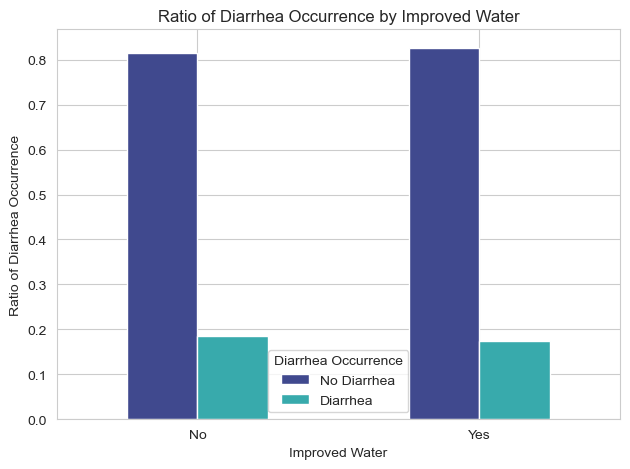

In [118]:
#EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate counts
counts = df1.groupby(['improved_water', 'Diarrhea Occurrence']).size().unstack()

# Calculate ratios
ratios = counts.div(counts.sum(axis=1), axis=0)
colors = sns.color_palette('mako', n_colors=ratios.shape[1])
# Plot countplot
ax = ratios.plot(kind='bar', color=colors)
plt.xlabel('Improved Water')
ax.set_xticklabels(['No', 'Yes'])

plt.ylabel('Ratio of Diarrhea Occurrence')
plt.title('Ratio of Diarrhea Occurrence by Improved Water')
plt.savefig("diarrheabywater.png", dpi=300)
plt.xticks(rotation=0)
plt.legend(title='Diarrhea Occurrence', labels=['No Diarrhea', 'Diarrhea'])
plt.tight_layout()
plt.show()

In [94]:
ratios

Diarrhea Occurrence,0.0,1.0
improved_water,,
0,0.814860,0.185140
1,0.825894,0.174106


In [95]:
df2

,Diarrhea Occurrence,Region,Place of Residence,improved_water,improved_toilet,year
0,0.0,Khyber Pakhtunkhwa,Rural,0,0,2017-18
2,0.0,Khyber Pakhtunkhwa,Rural,0,0,2017-18
3,0.0,Khyber Pakhtunkhwa,Rural,0,0,2017-18
4,0.0,Khyber Pakhtunkhwa,Rural,0,0,2017-18
5,0.0,Khyber Pakhtunkhwa,Rural,1,0,2017-18
...,...,...,...,...,...,...
11383,0.0,Gilgit Baltistan,Rural,1,0,2017-18
11384,0.0,Gilgit Baltistan,Rural,1,1,2017-18
11385,0.0,Gilgit Baltistan,Rural,1,1,2017-18
11386,0.0,Gilgit Baltistan,Rural,1,0,2017-18


In [96]:
cdf

,Diarrhea Occurrence,Region,Place of Residence,improved_water,improved_toilet,year
0,0.0,Khyber Pakhtunkhwa,Rural,0,0,2017-18
1,0.0,Khyber Pakhtunkhwa,Rural,0,0,2017-18
2,0.0,Khyber Pakhtunkhwa,Rural,0,0,2017-18
3,0.0,Khyber Pakhtunkhwa,Rural,0,0,2017-18
4,0.0,Khyber Pakhtunkhwa,Rural,1,0,2017-18
...,...,...,...,...,...,...
20576,0.0,Islamabad (ICT),Rural,1,1,2012-13
20577,0.0,Islamabad (ICT),Rural,1,1,2012-13
20578,0.0,Islamabad (ICT),Rural,1,1,2012-13
20579,0.0,Islamabad (ICT),Rural,1,1,2012-13


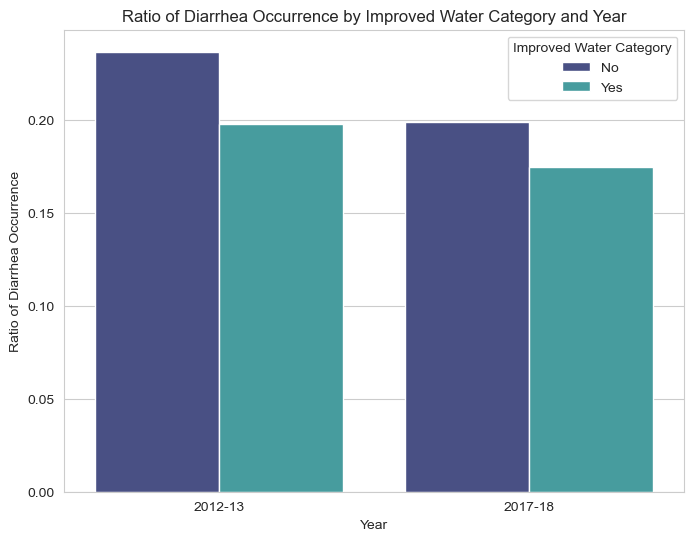

In [109]:
cdf['improved_water']=cdf['improved_water'].replace({0: 'No', 1: 'Yes'})
# Calculate the ratio of Diarrhea Occurrence equal to 1 for each year and improved_water category
ratios = cdf.groupby(['year', 'improved_water'])['Diarrhea Occurrence'].mean().reset_index()

# Set the style of the plot
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(data=ratios, x='year', y='Diarrhea Occurrence', hue='improved_water', palette='mako')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Ratio of Diarrhea Occurrence')
plt.title('Ratio of Diarrhea Occurrence by Improved Water Category and Year')
plt.savefig("diarrheabywater.png", dpi=300)
# Show the plot
plt.legend(title='Improved Water Category')
plt.show()


In [98]:
ratios

,year,improved_water,Diarrhea Occurrence
0,2012-13,No,0.236865
1,2012-13,Yes,0.198210
2,2017-18,No,0.199095
3,2017-18,Yes,0.174806


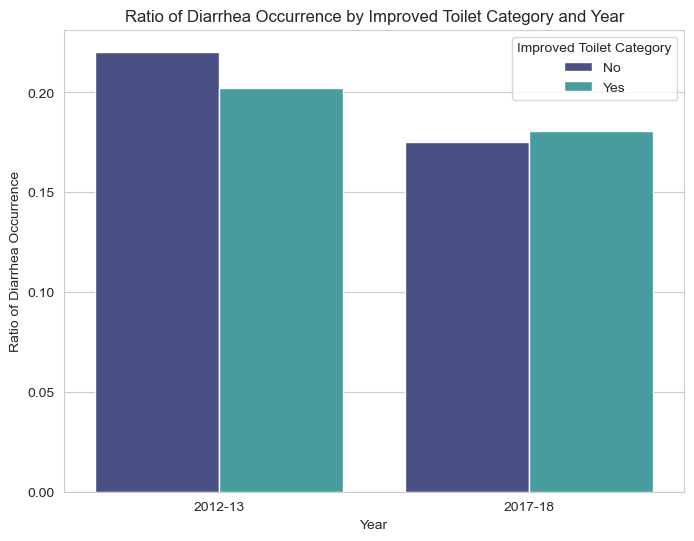

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
cdf['improved_toilet']=cdf['improved_toilet'].replace({0: 'No', 1: 'Yes'})
# Calculate the ratio of Diarrhea Occurrence equal to 1 for each year and improved_toilet category
ratios = cdf.groupby(['year', 'improved_toilet'])['Diarrhea Occurrence'].mean().reset_index()

# Set the style of the plot
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(data=ratios, x='year', y='Diarrhea Occurrence', hue='improved_toilet', palette='mako')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Ratio of Diarrhea Occurrence')
plt.title('Ratio of Diarrhea Occurrence by Improved Toilet Category and Year')
plt.savefig("diarrheabytoilet.png", dpi=300)
# Show the plot
plt.legend(title='Improved Toilet Category')
plt.show()


In [100]:
ratios

,year,improved_toilet,Diarrhea Occurrence
0,2012-13,No,0.220418
1,2012-13,Yes,0.202484
2,2017-18,No,0.174964
3,2017-18,Yes,0.180478


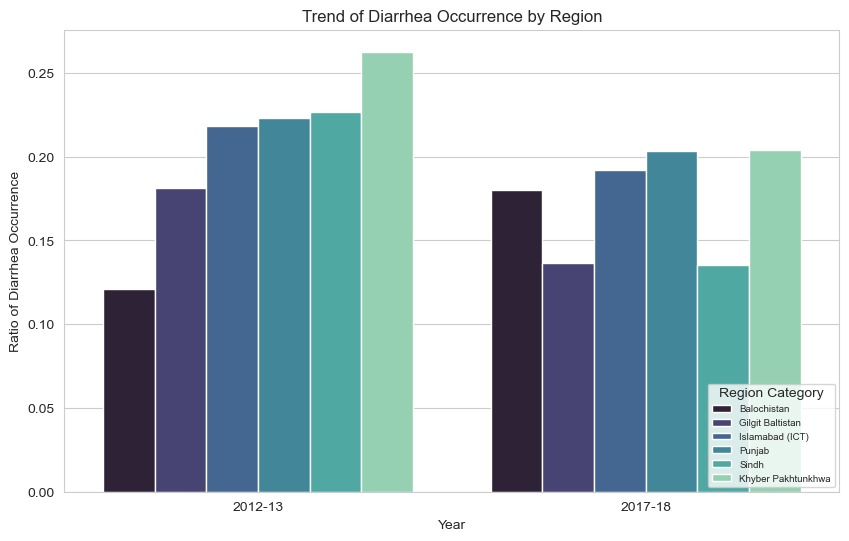

In [119]:
ratios = cdf.groupby(['year', 'Region'])['Diarrhea Occurrence'].mean().reset_index()

# Sort the DataFrame by 'year' and 'Diarrhea Occurrence' in ascending order
ratios.sort_values(by=['year', 'Diarrhea Occurrence'], ascending=[True, True], inplace=True)

# Set the style of the plot
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(data=ratios, x='year', y='Diarrhea Occurrence', hue='Region', palette='mako')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Ratio of Diarrhea Occurrence')
plt.title('Trend of Diarrhea Occurrence by Region')
plt.savefig("diarrheabyregion.png", dpi=300)
# Show the plot
plt.legend(title='Region Category', loc='lower right', fontsize=7)
plt.show()


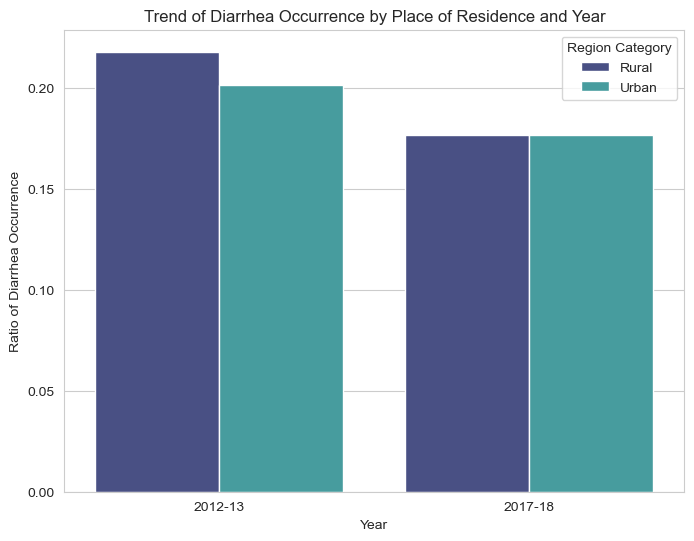

In [112]:
# Calculate the ratio of Diarrhea Occurrence equal to 1 for each year and improved_water category
ratios = cdf.groupby(['year', 'Place of Residence'])['Diarrhea Occurrence'].mean().reset_index()

# Set the style of the plot
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(data=ratios, x='year', y='Diarrhea Occurrence', hue='Place of Residence', palette='mako')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Ratio of Diarrhea Occurrence')
plt.title('Trend of Diarrhea Occurrence by Place of Residence and Year')
plt.savefig("diarrheabyresidence.png", dpi=300)
# Show the plot
plt.legend(title='Region Category', loc= 'upper right', fontsize=10)
plt.show()


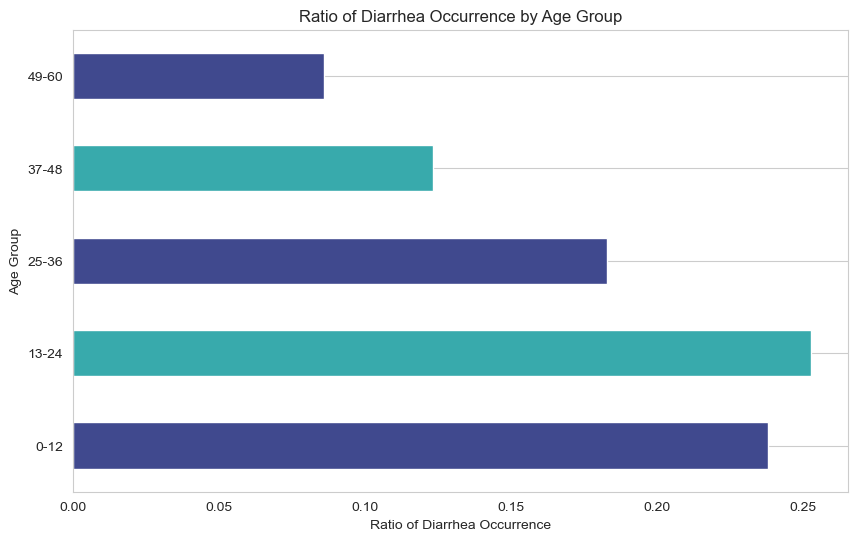

In [113]:
# Plot the line chart
# Define age bands
age_bins = [0, 12, 24, 36, 48, 60]
age_labels = ['0-12', '13-24', '25-36', '37-48', '49-60']

# Cut the Age in Months into age bands
df1['Age Group'] = pd.cut(df1['Age in Months'], bins=age_bins, labels=age_labels, right=False)

# Calculate the mean Diarrhea Occurrence for each age group
age_diarrhea_mean = df1.groupby('Age Group')['Diarrhea Occurrence'].mean()

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
age_diarrhea_mean.plot(kind='barh', color=colors)

# Add labels and title
plt.xlabel('Ratio of Diarrhea Occurrence')
plt.ylabel('Age Group')
plt.title('Ratio of Diarrhea Occurrence by Age Group')
plt.savefig("diarrheabyage.png", dpi=300)
# Display the plot
plt.grid(axis='x')  # Add gridlines only on x-axis
plt.show()

# Cross Tabulation

In [180]:
cross_tab = pd.crosstab(index=[df1['Diarrhea Occurrence']], columns=df1['improved_toilet'])

In [181]:
cross_tab

improved_toilet,0,1
Diarrhea Occurrence,,
0.0,3859,5676
1.0,797,1235


In [182]:
cross_tab1 = pd.crosstab(index=[df1['Diarrhea Occurrence']], columns=df1['improved_water'])

In [183]:
cross_tab1

improved_water,0,1
Diarrhea Occurrence,,
0.0,1338,8197
1.0,304,1728


# Running a Logistic Regression Model

In [114]:
#Running a logistic regression model
import statsmodels.api as sm

# Define independent variables (numerical data)
X = df1.select_dtypes(include='number').drop(columns=['Diarrhea Occurrence'], axis=1)

# Add constant term
X = sm.add_constant(X)

# Define dependent variable
y = df1['Diarrhea Occurrence']

# Fit logistic regression model
logit_model = sm.Logit(y, X, max_iter=50)
result = logit_model.fit()

# Display summary statistics and regression coefficients
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.447779
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     Diarrhea Occurrence   No. Observations:                11567
Model:                           Logit   Df Residuals:                    11546
Method:                            MLE   Df Model:                           20
Date:                 Wed, 08 May 2024   Pseudo R-squ.:                 0.03655
Time:                         23:11:50   Log-Likelihood:                -5179.5
converged:                        True   LL-Null:                       -5376.0
Covariance Type:             nonrobust   LLR p-value:                 5.784e-71
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5873      0.276     -2.130      0.033      -

D:\Anaconda3\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
D:\Anaconda3\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11567 entries, 0 to 12707
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diarrhea Occurrence      11567 non-null  float64
 1   caseid                   11567 non-null  object 
 2   Age in Months            11567 non-null  int8   
 3   mother's age             11567 non-null  int8   
 4   No. Household Members    11567 non-null  int8   
 5   Educational Attainment   11567 non-null  float64
 6   Mother's Working Status  11567 non-null  float64
 7   improved_toilet          11567 non-null  int32  
 8   improved_water           11567 non-null  int32  
 9   Gender_male              11567 non-null  float64
 10  Size_Child               11567 non-null  float64
 11  Birth Weight             11567 non-null  float64
 12  Age Difference Parents   11567 non-null  float64
 13  Wealth                   11567 non-null  float64
 14  Residence_Urban       

In [64]:
corr_diarrhea = df1.corr()['Diarrhea Occurrence'].drop('Diarrhea Occurrence').to_frame()
corr_diarrhea

C:\Users\User\AppData\Local\Temp\ipykernel_8076\4068845492.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_diarrhea = df1.corr()['Diarrhea Occurrence'].drop('Diarrhea Occurrence').to_frame()


,Diarrhea Occurrence
Age in Months,-0.157505
mother's age,-0.058772
No. Household Members,0.005120
Educational Attainment,0.003007
Mother's Working Status,-0.017547
improved_toilet,0.009696
improved_water,-0.010120
Gender_male,0.017488
Size_Child,-0.026767
Birth Weight,0.010766


In [68]:
df1['Age in Months'].describe()

count    11567.000000
mean        29.425175
std         17.502652
min          0.000000
25%         14.000000
50%         29.000000
75%         45.000000
max         59.000000
Name: Age in Months, dtype: float64

In [147]:
df1.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_8076\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Diarrhea Occurrence,Age in Months,mother's age,No. Household Members,Educational Attainment,Mother's Working Status,improved_toilet,improved_water,Gender_male,Size_Child,...,Age Difference Parents,Wealth,Residence_Urban,Region_sindh,Region_kpk,Region_balochistan,Region_gb,Region_ict,Region_ajk,Region_fata
Diarrhea Occurrence,1.000000,-0.157505,-0.058772,0.005120,0.003007,-0.017547,0.009696,-0.010120,0.017488,-0.026767,...,0.022296,-0.006505,-0.000938,-0.051487,0.032655,0.004418,-0.029760,0.010295,-0.022873,0.017391
Age in Months,-0.157505,1.000000,0.206964,-0.031891,-0.039141,0.046624,-0.015354,0.008211,0.013389,0.070107,...,0.011057,-0.023715,-0.002430,0.002531,-0.000109,0.008379,0.011715,-0.012954,-0.005356,0.002255
mother's age,-0.058772,0.206964,1.000000,0.009607,-0.042848,0.082732,-0.028302,-0.010323,-0.003060,0.018332,...,-0.038108,-0.031201,-0.018633,-0.010951,-0.036881,0.023179,0.037364,-0.001763,0.048594,-0.034751
No. Household Members,0.005120,-0.031891,0.009607,1.000000,-0.107459,-0.070182,0.018685,-0.003849,-0.013995,0.022745,...,-0.041280,0.059377,-0.001711,-0.014175,0.102800,0.119019,-0.005928,-0.072634,-0.102825,0.085197
Educational Attainment,0.003007,-0.039141,-0.042848,-0.107459,1.000000,0.031649,0.300906,0.130701,0.004288,0.053326,...,-0.048365,0.606153,0.296724,-0.051142,-0.051618,-0.170551,0.050854,0.150933,0.159184,-0.198047
Mother's Working Status,-0.017547,0.046624,0.082732,-0.070182,0.031649,1.000000,-0.037131,0.028749,-0.010876,-0.028113,...,-0.015514,-0.068047,-0.035112,0.099947,-0.088506,-0.001312,-0.033674,-0.000305,-0.006737,-0.091206
improved_toilet,0.009696,-0.015354,-0.028302,0.018685,0.300906,-0.037131,1.000000,0.143986,-0.012939,0.030048,...,-0.001180,0.495840,0.288648,0.029751,0.145145,-0.126997,0.022606,0.102609,-0.127233,-0.200747
improved_water,-0.010120,0.008211,-0.010323,-0.003849,0.130701,0.028749,0.143986,1.000000,-0.006249,0.024379,...,0.003534,0.242408,0.133856,0.074016,0.010941,-0.070838,-0.030884,0.030028,-0.123982,-0.144786
Gender_male,0.017488,0.013389,-0.003060,-0.013995,0.004288,-0.010876,-0.012939,-0.006249,1.000000,-0.006835,...,0.019028,0.005159,0.009595,-0.018481,-0.006761,0.008114,0.006842,0.001839,0.013199,0.007339
Size_Child,-0.026767,0.070107,0.018332,0.022745,0.053326,-0.028113,0.030048,0.024379,-0.006835,1.000000,...,-0.020508,0.077771,0.062290,0.025457,0.004446,0.004155,-0.005124,0.010979,-0.006016,0.017201
